<a href="https://colab.research.google.com/github/Anderson-Zeng/CS-7641/blob/main/7641_project_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 Data setup testing
**Not necessary to run for testing/eval**  
Original code written by Anderson and Botao. Preserved for documentation purposes.  
Useful to get a better understanding of what's going on in section 1., where the visualizations/etc. have all been removed for execution speed.

**Be warned** that if you run this section, it will occcupy a **lot** of memory, and you probably won't be able to run anything else in the notebook. If that happens, just restart your runtime (runtime>restart runtime).

## 0.1 Imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

You can check to make sure a GPU is available using the following code block.

If the below message is shown, it means you are using a CPU.
```
/bin/bash: nvidia-smi: command not found
```

---





In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


## 0.2 Data prep

Load images, perform feature extraction / refine into usable data (rather than raw RGB), split into training and test sets, apply cleaning/dimensionality reduction, etc.

## 0.2.1 Images loading from google drive
Anderson has shared the goolge drive folder which contains dataset to everyone, 
so just use that folder to run our code <br>
In your Google Drive, you need to drag that folder from "share with me" to "my drive", then you will be good to go


In [ ]:
# Anderson has shared the goolge drive folder which contains dataset to everyone, so just use that folder to run our code
# In your Google Drive, you need to drag that folder from "share with me" to "my drive", then you will be good to go
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
from pathlib import Path
from PIL import Image
import tensorflow as tf
import os

# for dirname, _, filenames in os.walk('/content/drive/MyDrive'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [ ]:
### Botao's test 
import matplotlib.pyplot as plt
import cv2 # OpenCV
import numpy as np
import os
import random
import tensorflow as tf
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D , Dropout,Flatten, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Botao 's test
DIR1 = '/content/drive/MyDrive/archive/Decks'
DIR2 = '/content/drive/MyDrive/archive/Pavements'
DIR3 = '/content/drive/MyDrive/archive/Walls'
label = ['Non-cracked', 'Cracked']
def load_image(data_dir):
    img_data = []
    
    for word in label:
        path = os.path.join(data_dir, word)
        y_label = label.index(word)
        
        for img_name in tqdm(os.listdir(path)):
            img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
            #resizing = cv2.resize(img, (120,120))                               # If needed, we can resizing image to lower pixels for faster modeling test time.
            
            img_data.append([img, y_label])
            
    return np.array(img_data)


Would suggest loading folders separately, in case crushed. If there is error, reload that block again, then should be fine

In [ ]:
# Load Decks Foler
dataset_Decks = load_image(DIR1)


100%|██████████| 2025/2025 [00:37<00:00, 54.20it/s] 
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
# Load Pavements Foler
dataset_Pavements = load_image(DIR2)


OSError: ignored

In [ ]:
# Load Walls Foler
dataset_Walls = load_image(DIR3)

##0.2.2 Visulize our dataset

number of positive(1) and negative(0) 



In [ ]:
#Images = []
import seaborn as sns

def visualize_dataset (a):
    visualize = []
    for i in a:
        if(i[1] == 0):
            visualize.append("Neg")
        elif(i[1] == 1):
            visualize.append("Pos")
    
    return visualize

visualization_Decks = visualize_dataset (dataset_Decks)
visualization_Pavements = visualize_dataset (dataset_Pavements)
visualization_Walls = visualize_dataset (dataset_Walls)

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(visualization_Decks)
axl.set_title("Number of Decks Images")


In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(visualization_Pavements)
axl.set_title("Number of Pavements Images")

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(visualization_Walls)
axl.set_title("Number of Walls Images")

## 0.2.3 Visulize images


In [ ]:
# Example of how to visulize images from our dataset
# Pick dataset_Decks No.11360 image to display
#plt.figure(figsize = (12,12))
sns.set_style('white')
plt.imshow(dataset_Decks[11359][0], cmap = 'gray')

In [ ]:
dataset_Decks[11359]

In [ ]:
#test print
dataset_Decks[11359], dataset_Decks.shape

In [ ]:
# Example of how to visulize images from our dataset
# Pick dataset_Pavement No.21740 image to display
#plt.figure(figsize = (12,12))
plt.imshow(dataset_Pavements[21739][0], cmap = 'gray')

In [ ]:
#test print
dataset_Pavements[21739], dataset_Pavements.shape

## 0.2.4-1 Test: Adding noise (white edge), Leave for a while

Succeed!




In [ ]:
# Filter cracked images from dataset_Pavement for adding white edge noise test

test_1=np.where(dataset_Pavements[:,1]==1)
adding_white_edge_test=dataset_Pavements[test_1]
#adding_white_edge_test.shape, adding_white_edge_test[:,0], adding_white_edge_test[0][0]


In [ ]:
# Adding white edge to right side for all the dataset_Pavement images for testing
# Learning how to add noise
white_side_image = np.zeros((256, 20), dtype = 'uint8') + 255
adding_white_edge_dataset = []
for i in range(adding_white_edge_test.shape[0]):
    adding_white_edge_dataset.append(np.concatenate((adding_white_edge_test[:,0][i], white_side_image), axis=1))

#new_dataset

In [ ]:
adding_white_edge_dataset

In [ ]:
# Randomly pick a image from added noise dste for testing
# Succeeded!
#plt.figure(figsize = (12,12))
plt.imshow(adding_white_edge_dataset[3], cmap = 'gray')

In [ ]:
adding_white_edge_dataset[3].shape

In [ ]:
# testing for resizing
resize_test = cv2.resize(adding_white_edge_dataset[3], (256,256))
plt.imshow(resize_test, cmap = 'gray')

In [ ]:
resize_test.shape

## 0.2.4-2 Test: Adding noise (flip image), Leave for a while
Succeed!

In [ ]:
# Learn how to flip images
# Filter cracked images from dataset_Pavement for adding Flip noise test

flip_test=dataset_Pavements[test_1]
#flip_test.shape, flip_test[:,0], flip_test[0][0]

In [ ]:
# Flip cracked images for all the dataset_Pavement images for testing
# Learning how to flip image

flip_dataset = []
for i in range(flip_test.shape[0]):
  flip_dataset.append(np.flip(flip_test[:,0][i])) 

#white_side_image = np.zeros((256, 20), dtype = 'uint8') + 255
#adding_white_edge_dataset = []
#for i in range(adding_white_edge_test.shape[0]):
    #adding_white_edge_dataset.append(np.concatenate((adding_white_edge_test[:,0][i], white_side_image), axis=1))

In [ ]:
# Randomly pick a image from fliped dataset for testing
# Succeeded!
#plt.figure(figsize = (12,12))
plt.imshow(flip_dataset[3], cmap = 'gray')

## 0.2.4-3 Test: Adding noise (blurring image), Leave for a while
Succeed!

In [ ]:
# Blur images
# we can use different kernel values to blur the image
def blurring(a):
    kernel = np.array([[0.1,0.1,0.1], [0.1,0.1,0.1], [0.1,0.1,0.1]])
    #kernel = np.array([[0.125,0.125,0.125], [0.125,0.25,0.125], [0.125,0.125,0.125]])
    #kernel = np.array([[1.0,2.0,1.0], [2.0,4.0,2.0], [1.0,2.0,1.0]])
    kernel = kernel / np.sum(kernel)
    arraylist = []
    for y in range(3):
        temparray = np.copy(a)
        temparray = np.roll(temparray, y - 1, axis=0)
        for x in range(3):
            temparray_X = np.copy(temparray)
            temparray_X = np.roll(temparray_X, x - 1, axis=1)*kernel[y,x]
            arraylist.append(temparray_X)

    arraylist = np.array(arraylist)
    arraylist_sum = np.sum(arraylist, axis=0)
    return arraylist_sum

In [ ]:
# Succeed!
blurring_image = blurring(dataset_Pavements[21739][0])
plt.figure(figsize = (6,6))
plt.imshow(blurring_image, cmap = 'gray')


In [ ]:
# print original image for blurred comparision
plt.figure(figsize = (6,6))
# original image
plt.imshow(dataset_Pavements[21739][0], cmap = 'gray')

##0.2.4 Define adding noise functions (White edge, Flip, Blur)

white_edge(),
flip(),
blur()

In [ ]:
def white_edge(a):
    distance = 20   # white edge distance that we want to add
    add_white_side_size = np.zeros((256, distance), dtype = 'uint8') + 255 
    added = np.concatenate((a, add_white_side_size), axis=1)
    resized = cv2.resize(added, (256,256)) 

    return resized

def flip(b):
    flipped = np.flip(b) 

    return flipped


def blur(c):
    kernel = np.array([[0.1,0.1,0.1], [0.1,0.1,0.1], [0.1,0.1,0.1]]) # we can use different kernel values to blur the image
    #kernel = np.array([[0.125,0.125,0.125], [0.125,0.25,0.125], [0.125,0.125,0.125]])
    #kernel = np.array([[1.0,2.0,1.0], [2.0,4.0,2.0], [1.0,2.0,1.0]])
    kernel = kernel / np.sum(kernel)
    arraylist = []
    for y in range(3):
        temparray = np.copy(c)
        temparray = np.roll(temparray, y - 1, axis=0)
        for x in range(3):
            temparray_X = np.copy(temparray)
            temparray_X = np.roll(temparray_X, x - 1, axis=1)*kernel[y,x]
            arraylist.append(temparray_X)

    arraylist = np.array(arraylist)
    arraylist_sum = np.sum(arraylist, axis=0)
    return arraylist_sum

In [ ]:
a = white_edge(dataset_Pavements[21739][0])
plt.imshow(a, cmap = 'gray')

In [ ]:
b = flip(dataset_Pavements[21739][0])
plt.imshow(b, cmap = 'gray')

In [ ]:
c = blur(dataset_Pavements[21739][0])
plt.imshow(c, cmap = 'gray')

##0.2.5 Generate Noise Dataset
Randomly pick images from dataset to add noise.<br>
5% of dataset are used for adding white edge，<br>
5% of dataset are used for flipping,<br>
10% of dataset are used for blurring.

In [ ]:
import random

#dataset_Decks_list = dataset_Decks.tolist()

def random_select(dataset, percent):
    num = round(percent*dataset.shape[0])
    random_images = random.choices(dataset, k=num)

    return np.array(random_images)


In [ ]:
def add_noise_processing(dataset, filter, percent):
    percent = percent
    dataset = dataset
    process_image = random_select(dataset, percent)
    #new_dataset
    for i in range(process_image.shape[0]):
        process_image[i][0] = filter(process_image[i][0])

    return np.array(process_image)

In [ ]:
percent_1 = 0.05
percent_2 = 0.1

Decks_addwhite_set = add_noise_processing(dataset_Decks, white_edge, percent_1)
Decks_flip_set = add_noise_processing(dataset_Decks, flip, percent_1)
Decks_blur_set = add_noise_processing(dataset_Decks, blur, percent_2)

Pavements_addwhite_set = add_noise_processing(dataset_Pavements, white_edge, percent_1)
Pavements_flip_set = add_noise_processing(dataset_Pavements, flip, percent_1)
Pavements_blur_set = add_noise_processing(dataset_Pavements, blur, percent_2)

Walls_addwhite_set = add_noise_processing(dataset_Walls, white_edge, percent_1)
Walls_flip_set = add_noise_processing(dataset_Walls, flip, percent_1)
Walls_blur_set = add_noise_processing(dataset_Walls, blur, percent_2)


In [ ]:
Decks_addwhite_set.shape, Decks_flip_set.shape, Decks_blur_set.shape

In [ ]:
Pavements_addwhite_set.shape, Pavements_flip_set.shape,Pavements_blur_set.shape

In [ ]:
Walls_addwhite_set.shape, Walls_flip_set.shape,Walls_blur_set.shape

**Prviding 3 added-noise dataset for Decks, Pavement, and Walls.**

In [ ]:
# Prviding 3 added-noise dataset for Decks, Pavement, and Walls.
Decks_noise_dataset = np.concatenate((Decks_addwhite_set, Decks_flip_set,Decks_blur_set), axis=0)
Pavements_noise_dataset = np.concatenate((Pavements_addwhite_set, Pavements_flip_set,Pavements_blur_set), axis=0)
Walls_noise_dataset = np.concatenate((Walls_addwhite_set, Walls_flip_set,Walls_blur_set), axis=0)

In [ ]:
#Tesing
#succeed
plt.imshow(Pavements_noise_dataset[1200][0], cmap = 'gray')

In [ ]:
visualization_Decks_noise_dataset = visualize_dataset(Decks_noise_dataset)
print(len(visualization_Decks_noise_dataset))
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(visualization_Decks_noise_dataset, order=['Neg', 'Pos'])
axl.set_title("Number of Decks Noise Images")

In [ ]:
visualization_Pavements_noise_dataset = visualize_dataset(Pavements_noise_dataset)
print(len(visualization_Pavements_noise_dataset))
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(visualization_Pavements_noise_dataset)
axl.set_title("Number of Pavements Noise Images")

In [ ]:
visualization_Walls_noise_dataset = visualize_dataset(Walls_noise_dataset)
print(len(visualization_Walls_noise_dataset))
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(visualization_Walls_noise_dataset)
axl.set_title("Number of Walls Noise Images")

##0.2.6 Prepare Dataset for training and testing

 After combine Noise_set with Normal_set.
 Generate 80% dataset for training; 20% dataset for testing。
 Shuffle training set and test set.




In [ ]:
def separete_dataset(normal_dataset, noise_dataset):
    all_set = np.concatenate((normal_dataset, noise_dataset), axis=0)
    print("all_dataset shape:")
    print(all_set.shape)
    np.random.shuffle(all_set)
    percent = 0.8
    row_number = round(percent*all_set.shape[0])

    training_set = all_set[0:row_number,:]
    testing_set = all_set[row_number:,:]
    return training_set, testing_set


In [ ]:
Decks_training_dataset, Decks_testing_dataset = separete_dataset(dataset_Decks, Decks_noise_dataset)

Decks_training_dataset.shape, Decks_testing_dataset.shape

In [ ]:
Pavements_training_dataset, Pavements_testing_dataset = separete_dataset(dataset_Pavements, Pavements_noise_dataset)

Pavements_training_dataset.shape, Pavements_testing_dataset.shape

In [ ]:
Walls_training_dataset, Walls_testing_dataset = separete_dataset(dataset_Walls, Walls_noise_dataset)

Walls_training_dataset.shape, Walls_testing_dataset.shape

In [ ]:
sns.set_style('white')
plt.imshow(Walls_training_dataset[1200][0], cmap = 'gray')

##0.2.7 Notes about Datasets


*   Three major datasets (Decks, Pavements, Walls) have been **added with noise images** (5% adding white edge, 5% flipping, 10% blurring) without replacing original images.
*   Three major datasets (Decks, Pavements, Walls) **are shuffled**. 
*   Each set is separated as **80% tranning set and 20% testing set** for our model


1.   *   Decks_training_dataset
     *   Decks_testing_dataset
2.   *   Pavements_training_dataset
     *   Pavements_testing_dataset
3.   *   Walls_training_dataset
     *   Walls_testing_dataset

*   Each dataset is a **[Nx2] array**, N is the number of datapoints for each set.
*   The first column of array contain images array with the **same size (256 x 256)**
*   The second column of array contain **0 (negative)** or **1 (positive)** as Ground Truth










# 1 Setup
New version of code originally written by Botao and Anderson in section 0. Refactored to avoid memory leak and make the clicking simpler.  
**Run this entire section** to import all the packages needed and to declare/define vital data-preparation functions.

## 1.1 Imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

You can check to make sure a GPU is available using the following code block.

If the below message is shown, it means you are using a CPU.
```
/bin/bash: nvidia-smi: command not found
```

---





In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


Anderson has shared the google drive folder which contains dataset to everyone, so just use that folder to run our code
In your Google Drive, you need to drag that folder from "share with me" to "my drive", then you will be good to go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
from pathlib import Path
from PIL import Image
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
import cv2 # OpenCV
import random
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

How many of these imports are we actually using?

## 1.2 Define data prep functions

### 1.2.1 Data loading
load_image(data_dir)

In [ ]:
def load_image(data_dir):
    label = ['Non-cracked', 'Cracked']
    img_data = []
    
    for word in label:
        path = os.path.join(data_dir, word)
        y_label = label.index(word)
        
        for img_name in tqdm(os.listdir(path)):
            img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
            # resized_img = cv2.resize(img, (64,64))                               # If needed, we can resizing image to lower pixels for faster modeling test time.
            #                                                                       update: actually, resizing here won't work because of the way white_edge is coded.
            
            img_data.append([img, y_label])
            
    return np.array(img_data)

### 1.2.2 Add noise
white_edge(data), flip(data), blur(data)

Why do we add noise? To make the model more robust (able to filter out noise in data). 

In [ ]:
def white_edge(data):
    distance = 20   # white edge distance that we want to add
    add_white_side_size = np.zeros((256, distance), dtype = 'uint8') + 255 
    added = np.concatenate((data, add_white_side_size), axis=1)
    resized = cv2.resize(added, (256,256)) 

    return resized

In [ ]:
def flip(data):
    flipped = np.flip(data) 

    return flipped

In [ ]:
def blur(data):
    kernel = np.array([[0.1,0.1,0.1], [0.1,0.1,0.1], [0.1,0.1,0.1]]) # we can use different kernel values to blur the image
    #kernel = np.array([[0.125,0.125,0.125], [0.125,0.25,0.125], [0.125,0.125,0.125]])
    #kernel = np.array([[1.0,2.0,1.0], [2.0,4.0,2.0], [1.0,2.0,1.0]])
    kernel = kernel / np.sum(kernel)
    arraylist = []
    for y in range(3):
        temparray = np.copy(data)
        temparray = np.roll(temparray, y - 1, axis=0)
        for x in range(3):
            temparray_X = np.copy(temparray)
            temparray_X = np.roll(temparray_X, x - 1, axis=1)*kernel[y,x]
            arraylist.append(temparray_X)

    arraylist = np.array(arraylist)
    arraylist_sum = np.sum(arraylist, axis=0)
    return arraylist_sum

### 1.2.3 Feature selection

Trying PCA

In [ ]:
def flatten_and_split_data(dataset):
    data = []
    labels = []
    for img, label in dataset:
       data.append(np.ndarray.flatten(img))
       labels.append(label)
    return np.array(data), np.array(labels)

In [ ]:
def get_pca_data(X, k=24):
    X, y = flatten_and_split_data(X)
    pca = PCA(n_components=k)
    X = pca.fit_transform(X)
    print("Explained variance ratio:")
    print(pca.explained_variance_ratio_)
    data = []
    for i in range(X.shape[0]):
        data.append([X[i], y[i]])
    return np.array(data)

split because of RAM issues

In [ ]:
# def pca_step_get_v(X, k):
#     X = flatten_data(X)
#     u, s, v = np.linalg.svd(X - np.average(X, axis=0), full_matrices=False, compute_uv=True)
#     return np.transpose(v)[:, :k]

In [ ]:
# def pca(X, k=24):
#     v = pca_step_get_v(X, k)
#     return np.matmul(X - np.average(X, axis=0), v)

### 1.2.4 Data mutation
random_select(dataset, percent),  
add_noise_processing(dataset, filter, percent),  
make_noise_sets(dataset, percents),  
make_full_noise_set(dataset, percents)

Apply the noise functions from 1.2.2

In [ ]:
def random_select(dataset, percent):
    num = round(percent*dataset.shape[0])
    random_images = random.choices(dataset, k=num)

    return np.array(random_images)

In [ ]:
def add_noise_processing(dataset, filter, percent):
    process_image = random_select(dataset, percent)
    #new_dataset
    for i in range(process_image.shape[0]):
        process_image[i][0] = filter(process_image[i][0])

    return np.array(process_image)

In [ ]:
def make_noise_sets(dataset, percents=(0.05, 0.05, 0.10)):
    data_white_set = add_noise_processing(dataset, white_edge, percents[0])
    data_flip_set = add_noise_processing(dataset_Decks, flip, percents[1])
    data_blur_set = add_noise_processing(dataset_Decks, blur, percents[2])
    return (data_white_set, data_flip_set, data_blur_set)

In [ ]:
def make_full_noise_set(dataset, percents=(0.05, 0.05, 0.10)):
    return np.concatenate(make_noise_sets(dataset, percents), axis=0)

### 1.2.5 Resize dataset and split into train/val
combine_dataset(normal_dataset, noise_dataset),  
resize_dataset(dataset, size),  
split_dataset(dataset, training_percent),  
full_data_prep(dataset, noise_percents, training_percent, image_size)


Combine Noise_set with Normal_set.  
Generate 80% dataset for training; 20% dataset for testing.  
Shuffle training set and test set.

In [ ]:
def combine_dataset(normal_dataset, noise_dataset):
    return np.concatenate((normal_dataset, noise_dataset), axis=0)

In [ ]:
def resize_dataset(dataset, size=256):
    resized_images = []
    for img, label in dataset:
      resized_img = cv2.resize(img, (size, size))    
      resized_images.append([resized_img, label])
    return np.array(resized_images)

In [ ]:
def split_dataset(dataset, training_percent=0.8):
    dataset_copy = np.copy(dataset)
    np.random.shuffle(dataset_copy)
    row_number = round(training_percent*dataset_copy.shape[0])

    training_set = dataset_copy[0:row_number,:]
    testing_set = dataset_copy[row_number:,:]
    return training_set, testing_set

In [ ]:
def full_data_prep(dataset, noise_percents=(0.05, 0.05, 0.10), training_percent=0.8, image_size=256):
    noise_dataset = make_full_noise_set(dataset, noise_percents)
    combined_dataset = combine_dataset(dataset, noise_dataset)
    resized_dataset = resize_dataset(combined_dataset, image_size)
    training_data, testing_data = split_dataset(resized_dataset, training_percent)
    return training_data, testing_data

### 1.2.6 Notes about Datasets

*   Three major datasets (Decks, Pavements, Walls) have been **added with noise images** (5% adding white edge, 5% flipping, 10% blurring) without replacing original images.
*   Three major datasets (Decks, Pavements, Walls) **are shuffled**. 
*   Each set is separated as **80% tranning set and 20% testing set** for our model


1.   *   Decks_training_dataset
     *   Decks_testing_dataset
2.   *   Pavements_training_dataset
     *   Pavements_testing_dataset
3.   *   Walls_training_dataset
     *   Walls_testing_dataset

*   Each dataset is a **[Nx2] array**, N is the number of datapoints for each set.
*   The first column of array contain images array with the **same size (256 x 256)**
*   The second column of array contain **0 (negative)** or **1 (positive)** as Ground Truth

# 2 Data
Execute functions defined in 1 to properly load the data.  
This will take some time.
(Should we consider using pandas dataframes to speed up the data loading step?)

## 2.1 Load and prepare data
Call the functions defined in 1.  
Currently, you should just load the **Decks** data while testing.

In [ ]:
DIR1 = '/content/drive/MyDrive/archive/Decks'
dataset_Decks = load_image(DIR1)

100%|██████████| 2025/2025 [00:08<00:00, 236.36it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


In [ ]:
# DIR2 = '/content/drive/MyDrive/archive/Pavements'
# dataset_Pavements = load_image(DIR2)

In [ ]:
# DIR3 = '/content/drive/MyDrive/archive/Walls'
# dataset_Walls = load_image(DIR3)

The above variables will be kept in memory to avoid needing to reload them if you want to change the dataset percents. In the future to save memory, we'll only save the mutated copies.

Images are 256 x 256 by default. Reduce this to speed up the model.

Note: currently the feature reduction with PCA will probably crash your runtime if you make image_size too large.

In [ ]:
image_size = 128

In [ ]:
white_edge_percent = 0.05
flip_percent = 0.05
blur_percent = 0.10
noise_percents = (white_edge_percent, flip_percent, blur_percent)

training_percent = 0.8

Just testing on Decks for now.

In [ ]:
# training_data, val_data = full_data_prep(dataset_Decks, noise_percents, training_percent, image_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
k = 4

Trying PCA and ignoring noise for now. Should be changed in the future.

In [ ]:
training_data, val_data = split_dataset(get_pca_data(resize_dataset(dataset_Decks, size=image_size), k), training_percent)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


Explained variance ratio:
[0.70905484 0.06063328 0.04096288 0.01524501]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
print(training_data.shape, val_data.shape)

(10706, 2) (2677, 2)


In [ ]:
print(training_data[0])

[array([ 3141.07051708, -2827.05025163,    51.87760832,  -622.75591382]) 0]


256x256 features per image because we're considering every feature individually.  
We're going to need to apply dimensionality reduction at some point.

# 3 Model

## 3.1 Model setup
Define hyperparameters, model architecture

In [ ]:
# placeholder values, examples
INPUT_DIM = k
HIDDEN_DIM = 12
OUTPUT_DIM = 1
LEARNING_RATE = 0.1
EPOCHS = 10

In [ ]:
class CrackDetectionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(CrackDetectionModel, self).__init__()

        # just examples; there are lots of different layer types to experiment with
        self.linear_layer_1 = nn.Linear(input_dim, hidden_dim)
        self.linear_layer_2 = nn.Linear(hidden_dim, hidden_dim)
        self.linear_layer_3 = nn.Linear(hidden_dim, output_dim)
        # note that sigmoid only works if output_dim is 1, otherwise use softmax
        self.sigmoid_out = nn.Sigmoid()

    def forward(self, input):
        # this is the function that gets called for training/eval;
        # model(input) will call this function
        
        ll_1_out = self.linear_layer_1(input)
        ll_2_out = self.linear_layer_2(ll_1_out)
        ll_3_out = self.linear_layer_3(ll_2_out)
        output   = self.sigmoid_out(ll_3_out)

        return output

## 3.2 Define loops

In [ ]:
def train(epoch, model, loss_function, optimizer):
    model.train()
    train_loss = 0
    train_examples = 0

    # this statement will need to be adjusted once we know more about the
    # shape of our data after processing
    for input, ground_truth_label in training_data:

        optimizer.zero_grad()

        # send to GPU, if active; assumes input is a tensor
        input = torch.Tensor(input).to(device)
        # may need to have additional input prep in the train loop
        # (e.g. when input is not a tensor)

        predicted_score = model(input)
        
        # because BCE loss works with batch training, it expects
        # tensor input. we aren't doing batches, but the label still
        # needs to be in a tensor. change this if we switch to batches.

        ground_truth_label = torch.Tensor([ground_truth_label]).to(device)

        loss = loss_function(predicted_score, ground_truth_label)
        
        # update model parameters
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_examples += 1
        # assumes only 1 example per loop currently

    
    avg_train_loss = train_loss / train_examples
    avg_val_loss, val_accuracy = evaluate(model, loss_function)
        
    print("Epoch: {}/{}\tAvg Train Loss: {:.4f}\tAvg Val Loss: {:.4f}\t Val Accuracy: {:.0f}".format(epoch, 
                                                                      EPOCHS, 
                                                                      avg_train_loss, 
                                                                      avg_val_loss,
                                                                      val_accuracy))

In [ ]:
def evaluate(model, loss_function):
    model.eval()
    correct = 0
    val_loss = 0
    val_examples = 0
    with torch.no_grad():
        for input, ground_truth_label in val_data:

            # val loop should look very similar to train loop

            # send to GPU, if active; assumes input is a tensor
            input = torch.Tensor(input).to(device)
            # may need to have additional input prep in the val loop
            # (e.g. when input is not a tensor)

            predicted_score = model(input)
            
            # see above note about BCE loss
            ground_truth_label = torch.Tensor([ground_truth_label]).to(device)
            
            loss = loss_function(predicted_score, ground_truth_label)
            
            # for multi-class this will need to be argmax
            # (only works for binary classification; 0 and 1 labels)
            predicted_label = round(predicted_score.item())

            # add 1 if the same, add 0 if different
            correct += int(predicted_label == ground_truth_label)

            val_loss += loss.item()
            val_examples += 1
            # assume one example per loop


    val_accuracy = 100.0 * correct / val_examples
    avg_val_loss = val_loss / val_examples
    return avg_val_loss, val_accuracy

## 3.3 Misc model functions
Just model saving, so far.

In [ ]:
def save_model(model, model_name, version):
  path = f'/content/drive/My Drive/Machine Learning Models/Crack Detection/{model_name}_ver_{version}.pth'
  print(f'Saving {model_name} model...')
  torch.save(model.state_dict(), path)
  print(f'{model_name} saved successfully.')

# 4 Execution

## 4.1 Train with default params

In [ ]:
# lots of optimizers and loss functions to choose from; not restricted to these

model = CrackDetectionModel(INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM).to(device)
optimizer = optim.Adagrad(model.parameters(), lr=LEARNING_RATE)
loss_function = nn.BCELoss().to(device)
# BCE loss expects tensor input, because it's designed for batches.
# We aren't currently running batches. 

for epoch in range(1, EPOCHS + 1): 
    train(epoch, model, loss_function, optimizer)

Epoch: 1/10	Avg Train Loss: 61.4874	Avg Val Loss: 60.1816	 Val Accuracy: 40
Epoch: 2/10	Avg Train Loss: 52.1239	Avg Val Loss: 55.5876	 Val Accuracy: 44
Epoch: 3/10	Avg Train Loss: 38.2618	Avg Val Loss: 37.2235	 Val Accuracy: 62
Epoch: 4/10	Avg Train Loss: 36.0369	Avg Val Loss: 36.3615	 Val Accuracy: 63
Epoch: 5/10	Avg Train Loss: 36.0113	Avg Val Loss: 36.3257	 Val Accuracy: 63
Epoch: 6/10	Avg Train Loss: 36.1400	Avg Val Loss: 37.0428	 Val Accuracy: 63
Epoch: 7/10	Avg Train Loss: 36.1382	Avg Val Loss: 36.4629	 Val Accuracy: 63
Epoch: 8/10	Avg Train Loss: 36.1186	Avg Val Loss: 36.8557	 Val Accuracy: 63
Epoch: 9/10	Avg Train Loss: 36.4136	Avg Val Loss: 36.9820	 Val Accuracy: 62
Epoch: 10/10	Avg Train Loss: 35.5792	Avg Val Loss: 36.3493	 Val Accuracy: 63


In [ ]:
ver = 0
name = 'pca_deck_128x128'
save_model(model, name, ver)

# 5 Analysis

In [ ]:
def get_labels():
    actual_labels = []
    predicted_labels = []
    for img, label in val_data:
        actual_labels.append(label)
        prediction = model(torch.Tensor(img))
        predicted_labels.append(round(prediction.item()))
    return np.array(actual_labels), np.array(predicted_labels)

below, I just copied inshira's code so that the original is preserved

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
actual_labels, predicted_labels = get_labels()

In [ ]:
print(confusion_matrix(actual_labels, predicted_labels))

[[1595  685]
 [ 296  101]]


In [ ]:
print(classification_report(actual_labels, predicted_labels, target_names=["Uncracked", "Cracked"]))

              precision    recall  f1-score   support

   Uncracked       0.84      0.70      0.76      2280
     Cracked       0.13      0.25      0.17       397

    accuracy                           0.63      2677
   macro avg       0.49      0.48      0.47      2677
weighted avg       0.74      0.63      0.68      2677



In [ ]:
print(log_loss(actual_labels, predicted_labels))

12.657111455975743


In [ ]:
print(roc_auc_score(actual_labels, predicted_labels))

0.4769847319810862


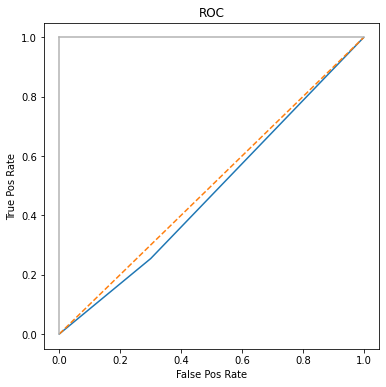

In [ ]:
fpr, tpr, threshold = roc_curve(actual_labels, predicted_labels)
plt.subplots(1,figsize=(6,6))
plt.title("ROC")
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0], [1,0], c=".7"), plt.plot([1,1], c=".7")
plt.ylabel("True Pos Rate")
plt.xlabel("False Pos Rate")
plt.show()

## 4.1
SKlearn metrics and anything else to report how the model is doing

In [ ]:
#Index 0 - Decks , 1 - Pavements, 2- Walls
deckNeg = len(np.where(np.asarray(visualization_Decks) == 'Neg')[0])
deckPos = len(np.where(np.asarray(visualization_Decks) == 'Pos')[0])
paveNeg = len(np.where(np.asarray(visualization_Pavements) == 'Neg')[0])
pavePos = len(np.where(np.asarray(visualization_Pavements) == 'Pos')[0])
wallNeg = len(np.where(np.asarray(visualization_Walls) == 'Neg')[0])
wallPos = len(np.where(np.asarray(visualization_Walls) == 'Pos')[0])
deckShape = Decks_training_dataset.shape[0]
paveShape = Pavements_training_dataset.shape[0]
wallShape = Walls_training_dataset.shape[0]
#print(deckNeg/deckShape, deckPos/deckShape)
temp_y_test = [Decks_testing_dataset[:,1].astype('int'), Pavements_testing_dataset[:,1].astype('int'),Walls_testing_dataset[:,1].astype('int')]
#Random Predictions for now
temp_y_pred = [np.random.choice(2, size=(Decks_testing_dataset.shape[0]), p=[deckNeg/deckShape, (1 - deckNeg/deckShape)] ).astype('int'),
               np.random.choice(2, size=(Pavements_testing_dataset.shape[0]), p=[paveNeg/paveShape, (1 - paveNeg/paveShape)]).astype('int'), 
               np.random.choice(2, size=(Walls_testing_dataset.shape[0]), p=[wallNeg/wallShape, (1 - wallNeg/wallShape)]).astype('int')]





NameError: ignored

Classification Report Metrics
  - Precision : Proportion of positive identifications that were correct = (TP / TP + FP)
  - Recall : Proportion of actual positive that were correctly classified = (TP / TP + FN)
  - F1 Score : Combination of Precision and Recall = 2 * (precision * recall) / (precision + recall) or (TP / TP + .5 * (FP + FN))
  - Support : Number of samples each metric was calculated with
  - Accuracy : Accuracy Score of the model the number of correct predictions (TP + TN / TP + TN + FP + FN)
  - Macro Avg : The averages of percision, recall and f1 score between the classes
  - Weighted Avg : averages of percision, recall and f1 score between the classes weighted by the amount of samples used in the class (Support) 

### Pavemnt Metrics

In [ ]:
# do stuff here
#Inshira 
# Video giving a good preveiw of differnet metric and what they will give - https://www.youtube.com/watch?v=qHosBSw_71o
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
classes = ["Uncracked", "Cracked"]

Decks Dataset
Log Loss : 7.785283057750799

Confusion Matrix :
[[2435  319]
 [ 405   53]]

Classification Report
              precision    recall  f1-score   support

   Uncracked       0.86      0.88      0.87      2754
     Cracked       0.14      0.12      0.13       458

    accuracy                           0.77      3212
   macro avg       0.50      0.50      0.50      3212
weighted avg       0.76      0.77      0.76      3212


ROC_AUC_Score : 0.49994450311258254


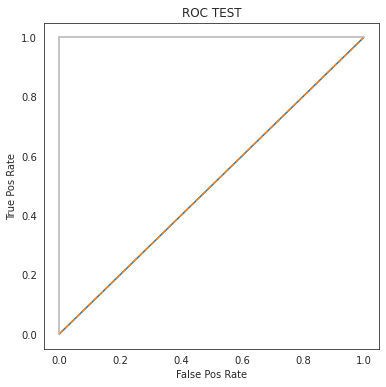


Accuracy is : 77.45952677459526


In [ ]:
# Decks 
#Log Loss - Evaluated error within the model
print("Decks Dataset")
ll_sk = log_loss(temp_y_test[0], temp_y_pred[0])
print("Log Loss :" ,ll_sk)
print()
#Confusion matrix - Simple table showing the results of the actual and predicted data
# gives the base values of TP, TN, FP and FN

cm = confusion_matrix(temp_y_test[0], temp_y_pred[0])
print("Confusion Matrix :")
print(cm)

print()
#Classification report - would give us the percision , recall , f1-score , support(# of samples) per class (Cracked vs Non Cracked)
#  as well as accuracy and averages
# Needs the test and model redictions as a parameter
# Video on what it gives https://youtu.be/XiUlqN1Ay0U?t=73
 
print("Classification Report")
print(classification_report(temp_y_test[0], temp_y_pred[0], target_names=classes))
print()

# ROC AUC 

fpr, tpr, threshold = roc_curve(temp_y_test[0], temp_y_pred[0])
print("ROC_AUC_Score :", roc_auc_score(temp_y_test[0], temp_y_pred[0]))
plt.subplots(1,figsize=(6,6))
plt.title("ROC TEST")
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0], [1,0], c=".7"), plt.plot([1,1], c=".7")
plt.ylabel("True Pos Rate")
plt.xlabel("False Pos Rate")
plt.show()
print()
#Accuracy

result = accuracy_score(temp_y_test[0], temp_y_pred[0])
print("Accuracy is :", result * 100)

Pavements Dataset
Log Loss : 5.539734292003701

Confusion Matrix :
[[4863  368]
 [ 569   42]]

Classification Report
              precision    recall  f1-score   support

   Uncracked       0.90      0.93      0.91      5231
     Cracked       0.10      0.07      0.08       611

    accuracy                           0.84      5842
   macro avg       0.50      0.50      0.50      5842
weighted avg       0.81      0.84      0.83      5842


ROC_AUC_Score : 0.4991949666801308


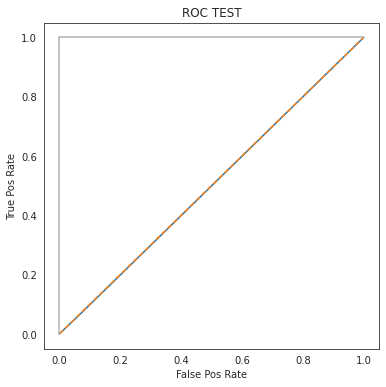


Accuracy is : 83.96097226977062


In [ ]:

# Pavements
#Log Loss - Evaluated error within the model
print("Pavements Dataset")
ll_sk = log_loss(temp_y_test[1], temp_y_pred[1])
print("Log Loss :" ,ll_sk)
print()
#Confusion matrix - Simple table showing the results of the actual and predicted data
# gives the base values of TP, TN, FP and FN

cm = confusion_matrix(temp_y_test[1], temp_y_pred[1])
print("Confusion Matrix :")
print(cm)

print()
#Classification report - would give us the percision , recall , f1-score , support(# of samples) per class (Cracked vs Non Cracked)
#  as well as accuracy and averages
# Needs the test and model redictions as a parameter
# Video on what it gives https://youtu.be/XiUlqN1Ay0U?t=73
 
print("Classification Report")
print(classification_report(temp_y_test[1], temp_y_pred[1], target_names=classes))
print()

# ROC AUC 

fpr, tpr, threshold = roc_curve(temp_y_test[1], temp_y_pred[1])
print("ROC_AUC_Score :", roc_auc_score(temp_y_test[1], temp_y_pred[1]))
plt.subplots(1,figsize=(6,6))
plt.title("ROC TEST")
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0], [1,0], c=".7"), plt.plot([1,1], c=".7")
plt.ylabel("True Pos Rate")
plt.xlabel("False Pos Rate")
plt.show()
print()
#Accuracy

result = accuracy_score(temp_y_test[1], temp_y_pred[1])
print("Accuracy is :", result * 100)

Walls Dataset
Log Loss : 11.13500551164761

Confusion Matrix :
[[2785  634]
 [ 770  166]]

Classification Report
              precision    recall  f1-score   support

   Uncracked       0.78      0.81      0.80      3419
     Cracked       0.21      0.18      0.19       936

    accuracy                           0.68      4355
   macro avg       0.50      0.50      0.49      4355
weighted avg       0.66      0.68      0.67      4355


ROC_AUC_Score : 0.4959580449124176


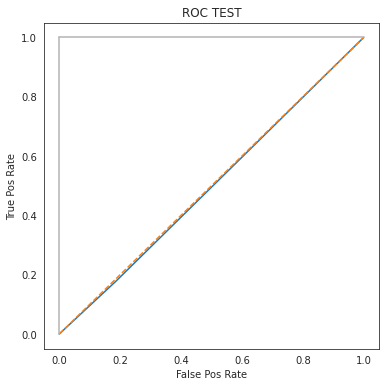


Accuracy is : 67.76119402985074


In [ ]:
# Walls
#Log Loss - Evaluated error within the model
print("Walls Dataset")
ll_sk = log_loss(temp_y_test[2], temp_y_pred[2])
print("Log Loss :" ,ll_sk)
print()
#Confusion matrix - Simple table showing the results of the actual and predicted data
# gives the base values of TP, TN, FP and FN

cm = confusion_matrix(temp_y_test[2], temp_y_pred[2])
print("Confusion Matrix :")
print(cm)

print()
#Classification report - would give us the percision , recall , f1-score , support(# of samples) per class (Cracked vs Non Cracked)
#  as well as accuracy and averages
# Needs the test and model redictions as a parameter
# Video on what it gives https://youtu.be/XiUlqN1Ay0U?t=73
 
print("Classification Report")
print(classification_report(temp_y_test[2], temp_y_pred[2], target_names=classes))
print()

# ROC AUC 

fpr, tpr, threshold = roc_curve(temp_y_test[2], temp_y_pred[2])
print("ROC_AUC_Score :", roc_auc_score(temp_y_test[2], temp_y_pred[2]))
plt.subplots(1,figsize=(6,6))
plt.title("ROC TEST")
plt.plot(fpr,tpr)
plt.plot([0,1], ls="--")
plt.plot([0,0], [1,0], c=".7"), plt.plot([1,1], c=".7")
plt.ylabel("True Pos Rate")
plt.xlabel("False Pos Rate")
plt.show()
print()
#Accuracy

result = accuracy_score(temp_y_test[2], temp_y_pred[2])
print("Accuracy is :", result * 100)